# Predicting Breast Cancer in a patient using SVM and Ensemble Techniques

### Problem Statement:
#### Given the details of cell nuclei taken from breast mass, predict whether or not a patient has breast cancer . Perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,classification_report,f1_score,plot_confusion_matrix,roc_auc_score,roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
import xgboost as xgb
import warnings
import math
warnings.filterwarnings('ignore')

#### Note: I am using a dark theme for juypter notebook, font colors are set to match the dark theme. 

In [2]:
# Set the default color for xticks and yticks
mpl.rcParams['xtick.color'] = 'cyan'
mpl.rcParams['ytick.color'] = 'cyan'
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

### Loading the required dataset

In [3]:
#Loading the dataset
df = pd.read_csv('C:\MLCourse\Learning\Guvi_Final_Projects\cancer.csv')
df.head(2)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  

[2 rows x 32 columns]

In [4]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [5]:
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})
df.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64

In [6]:
# Checking the size of the dataset
df.shape

(569, 32)

In [7]:
#Checking the datatype of columns
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
df = df.drop('id', axis=1)

### Exploratory Data Analysis

In [9]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [10]:
df.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64

#### Hence, Dataset is balanced

<Figure size 432x288 with 0 Axes>

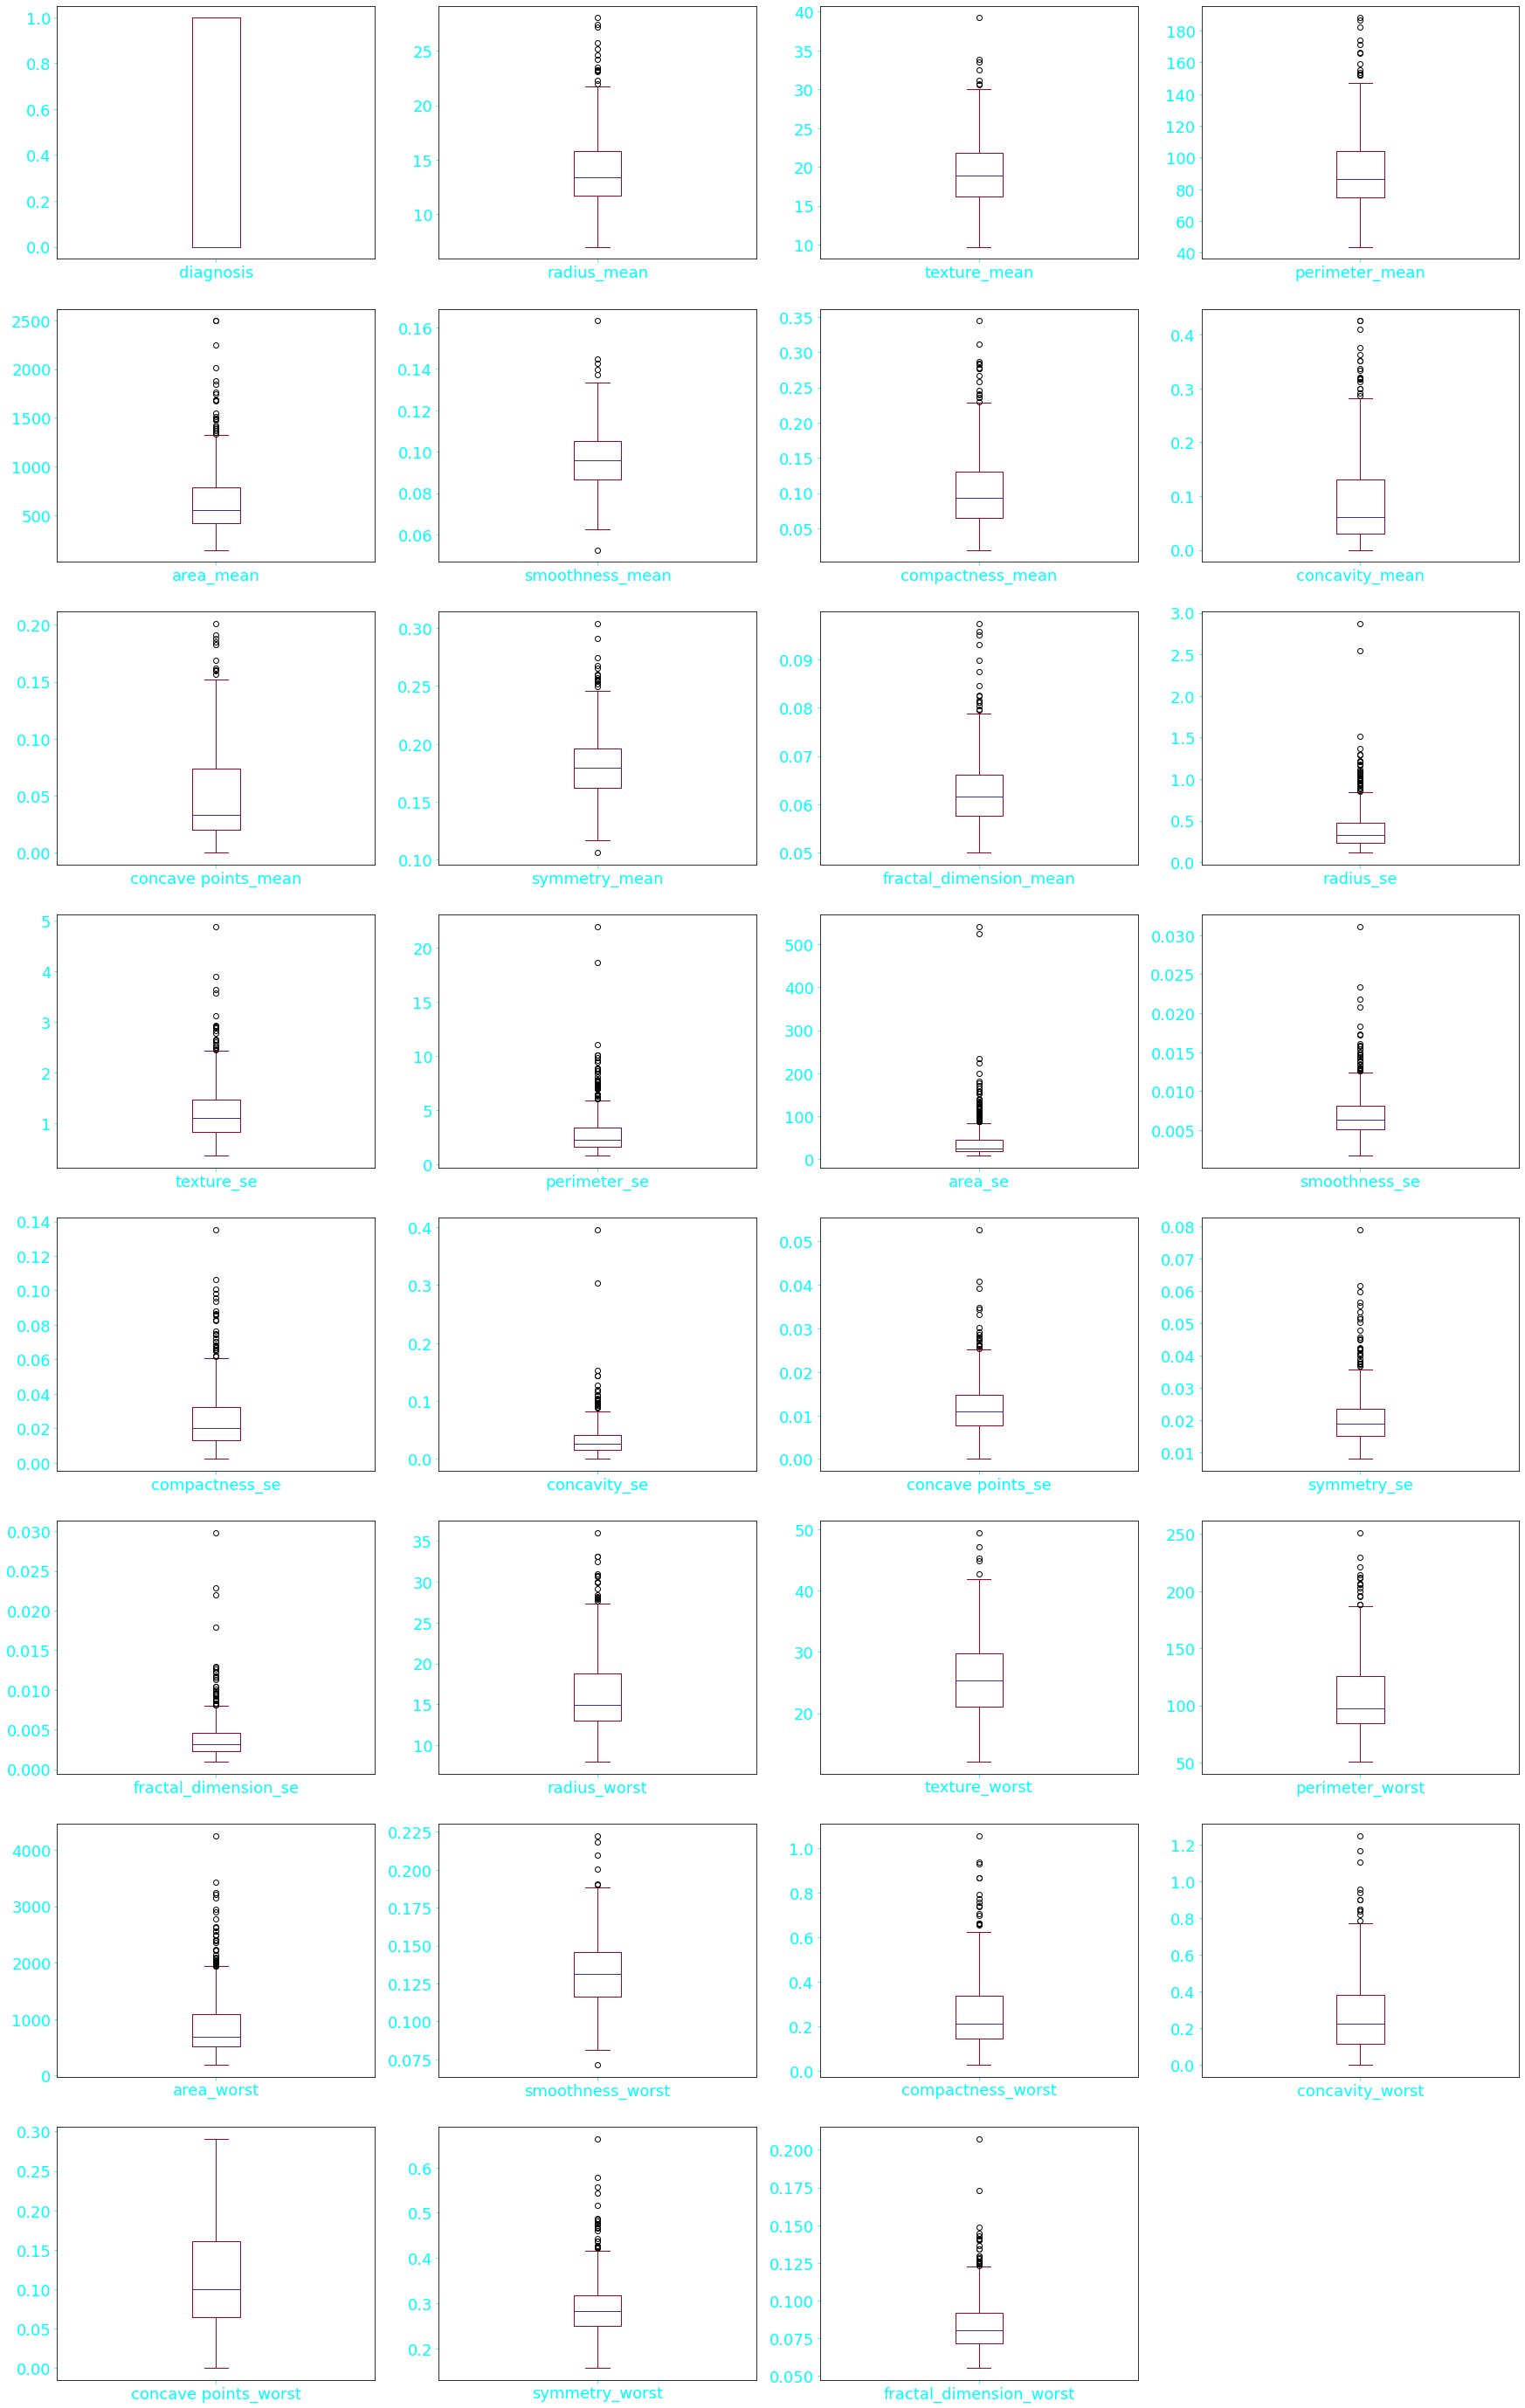

In [11]:
fig = plt.figure()
df.plot(kind='box', subplots=True, layout=(8,4),figsize=(30,50),colormap='RdYlBu')
plt.show()

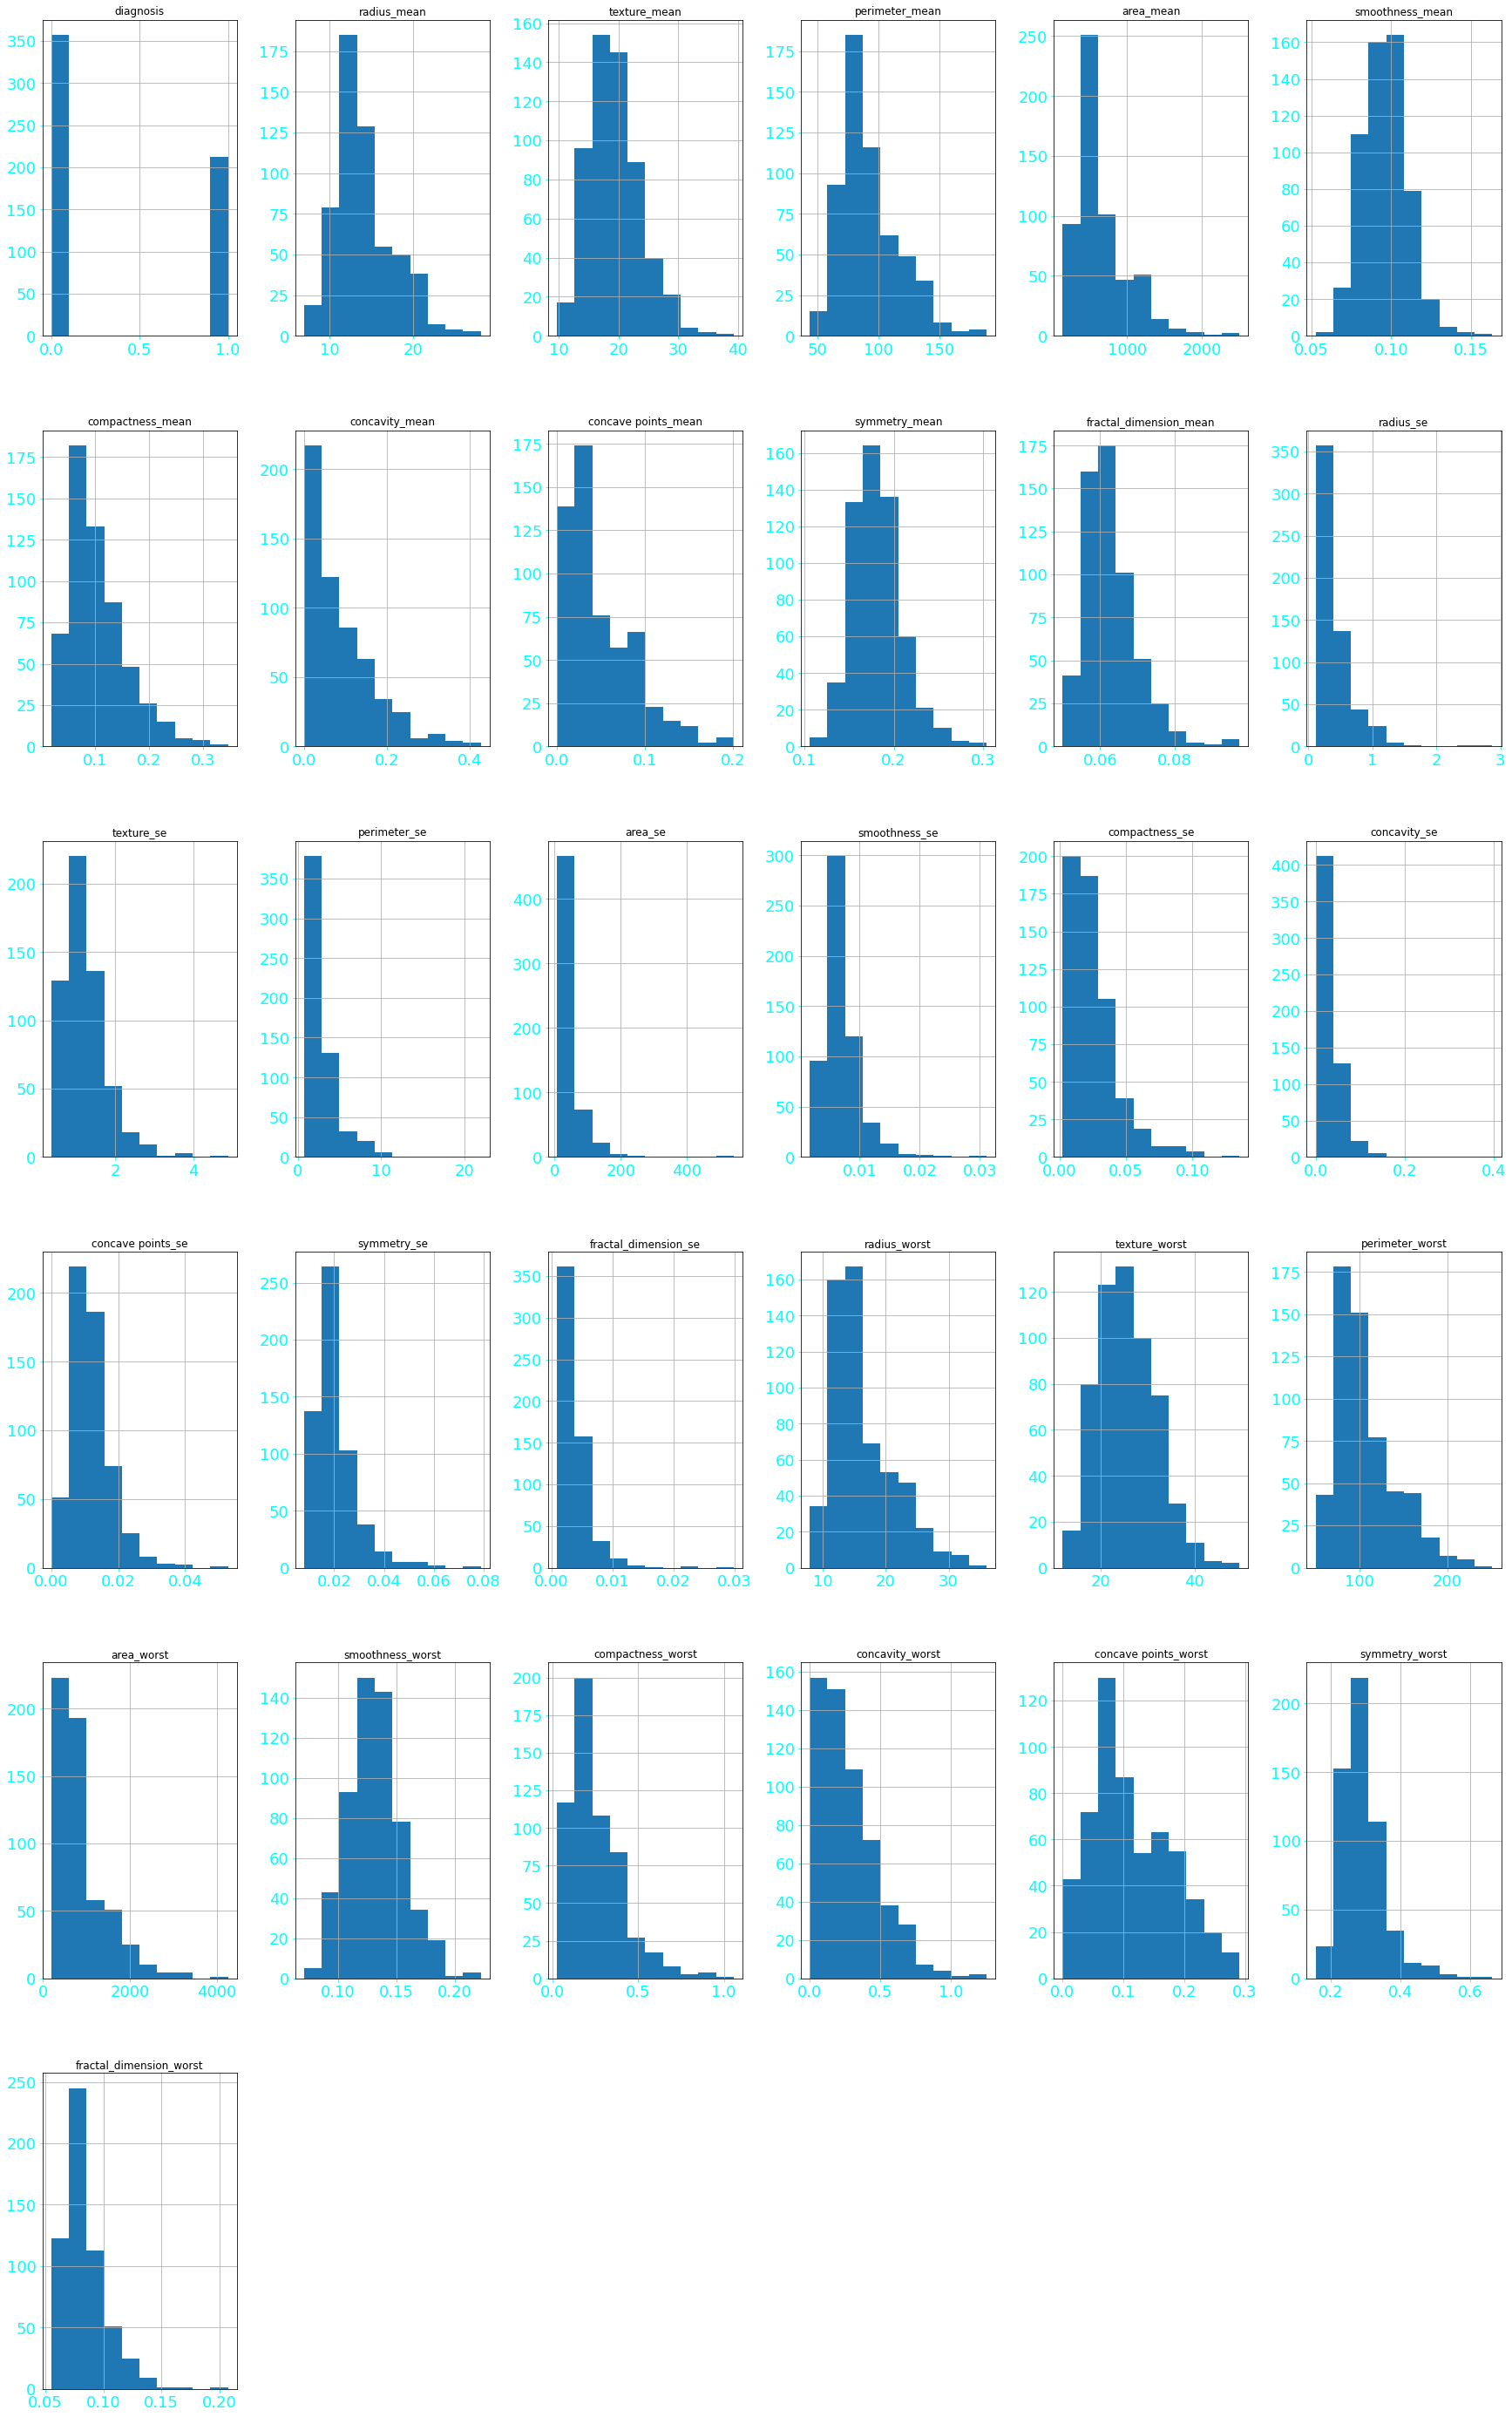

In [12]:
df.hist(figsize=(30,50))
plt.title('Histogram', color='red')
plt.show()

#### As evident above only a handful of features are normally distributed. While most of the features are right skewed

In [13]:
#Checking for any null values
df.isnull().sum().sum()

0

#### Let us explore the relationship between the important features as a pair to explore thier impact on target 

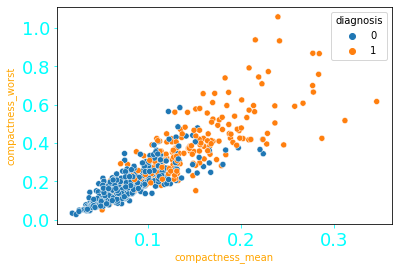

In [14]:
ax = sns.scatterplot('compactness_mean','compactness_worst',hue='diagnosis',data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### with the increase in compactness_mean beyong 0.11 and compactness_worst beyond 0.3, the chances of being Malignant(1) increases significantly

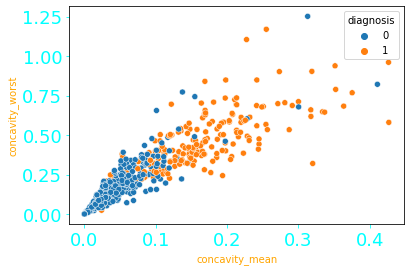

In [15]:
ax = sns.scatterplot('concavity_mean','concavity_worst',hue='diagnosis',data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### Barring a few outliers with the increase in concavity_mean beyond 0.1 and concavity_worst beyond 0.5, the chances of being Malignant(1) increases

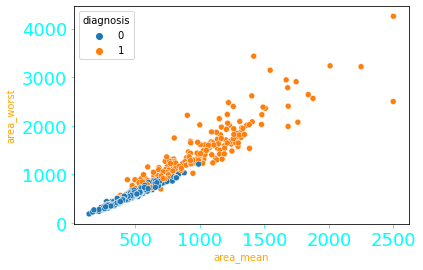

In [16]:
ax = sns.scatterplot('area_mean','area_worst',hue='diagnosis',data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### with the increase in area_mean beyond 1000 and area_worst beyond 800, the chances of being Malignant(1) increases

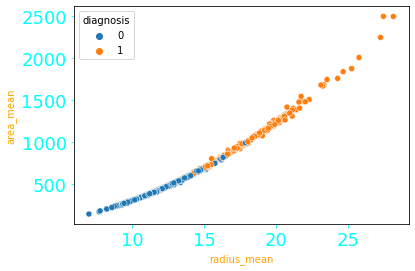

In [17]:
ax = sns.scatterplot('radius_mean','area_mean',hue='diagnosis',data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### with the increase in radius_mean beyond 17 and area_mean beyond 750, the chances of being Malignant(1) increases

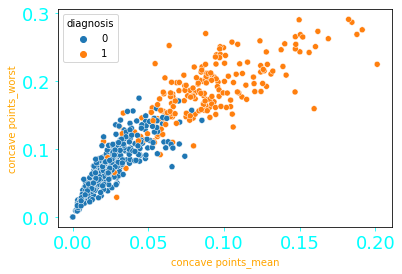

In [18]:
ax = sns.scatterplot('concave points_mean','concave points_worst',hue='diagnosis',data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### With the increase in concave_points_mean beyond 0.07 and concave_points_worst beyond 0.16  the chances of being Malignant(1) increases¶

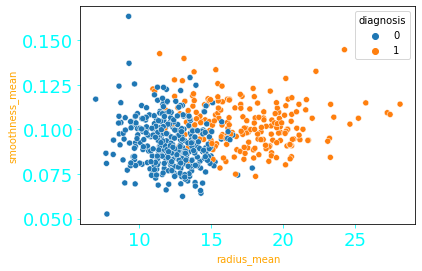

In [19]:
ax = sns.scatterplot('radius_mean','smoothness_mean',hue='diagnosis',data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### Regardless of the value of smoothness_mean, if the value of radius_mean is beyond 14,  the chances of being Malignant(1) increases

#### Now let us see the effect of individual features on the target

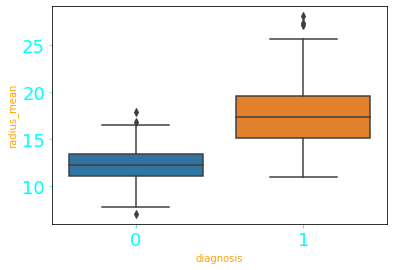

In [20]:
ax = sns.boxplot('diagnosis','radius_mean', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

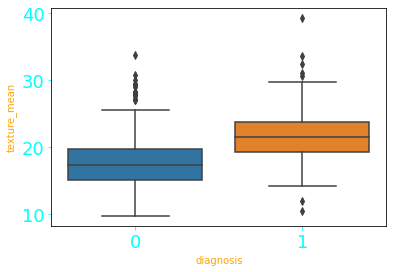

In [21]:
ax = sns.boxplot('diagnosis','texture_mean', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

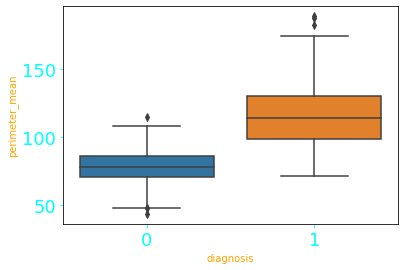

In [22]:
ax = sns.boxplot('diagnosis','perimeter_mean', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

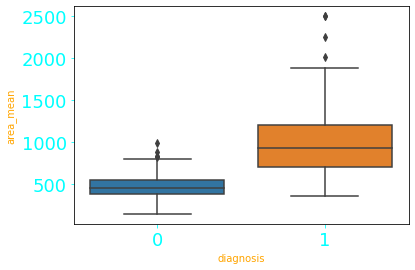

In [23]:
ax = sns.boxplot('diagnosis','area_mean', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

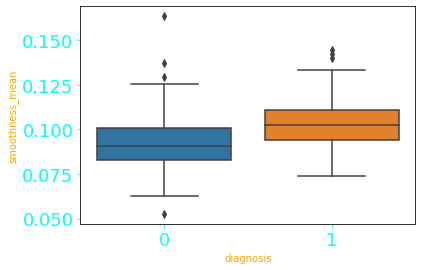

In [24]:
ax = sns.boxplot('diagnosis','smoothness_mean', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

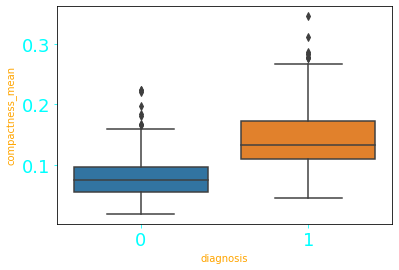

In [25]:
ax = sns.boxplot('diagnosis','compactness_mean', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

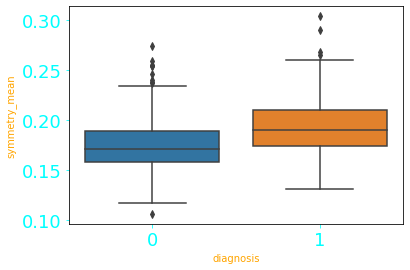

In [26]:
ax = sns.boxplot('diagnosis','symmetry_mean', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

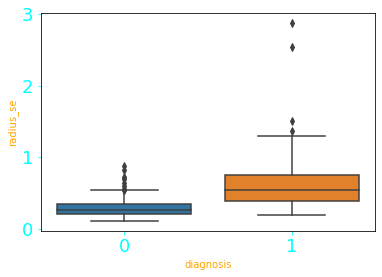

In [27]:
ax = sns.boxplot('diagnosis', 'radius_se', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

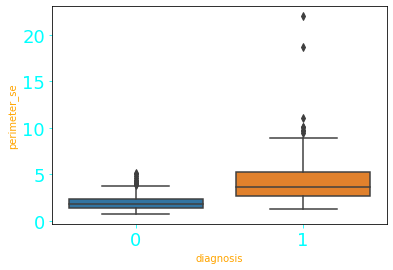

In [28]:
ax = sns.boxplot('diagnosis','perimeter_se', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

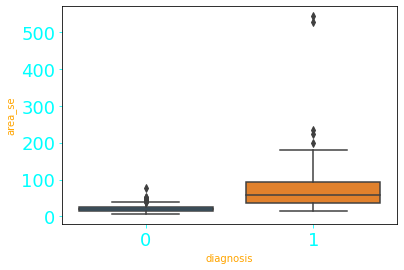

In [29]:
ax = sns.boxplot('diagnosis','area_se', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

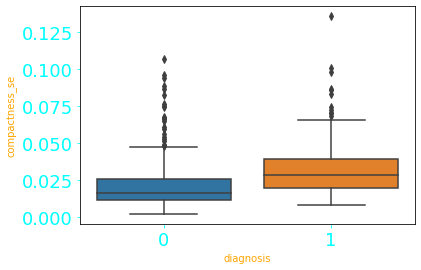

In [30]:
ax = sns.boxplot('diagnosis','compactness_se', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

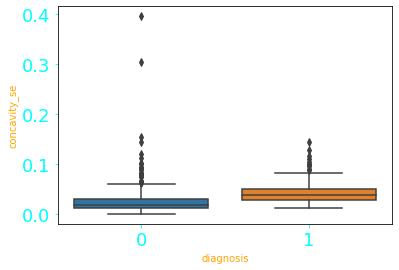

In [31]:
ax = sns.boxplot('diagnosis','concavity_se', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

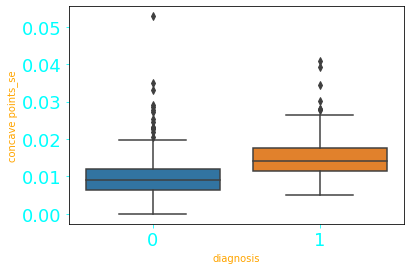

In [32]:
ax = sns.boxplot('diagnosis','concave points_se', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

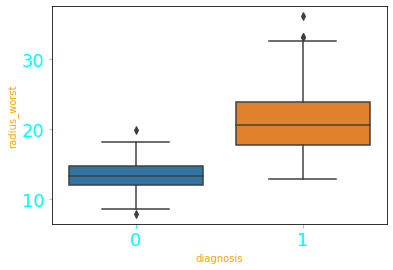

In [33]:
ax = sns.boxplot('diagnosis','radius_worst', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

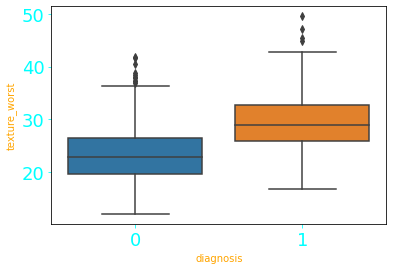

In [34]:
ax = sns.boxplot('diagnosis','texture_worst', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

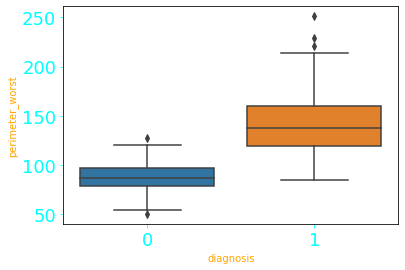

In [35]:
ax = sns.boxplot('diagnosis','perimeter_worst', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

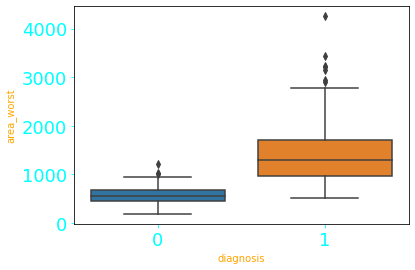

In [36]:
ax = sns.boxplot('diagnosis','area_worst', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

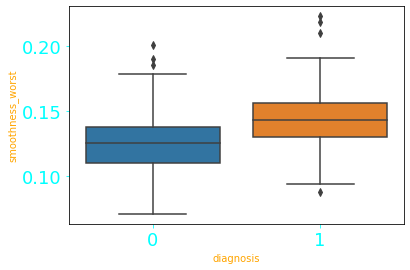

In [37]:
ax = sns.boxplot('diagnosis','smoothness_worst', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

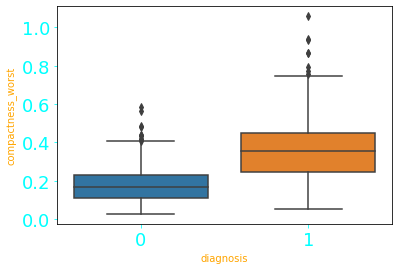

In [38]:
ax = sns.boxplot('diagnosis','compactness_worst', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

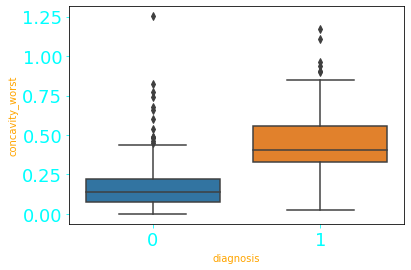

In [39]:
ax = sns.boxplot('diagnosis','concavity_worst', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

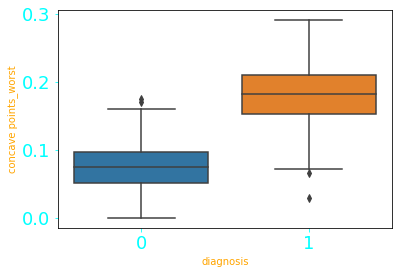

In [40]:
ax = sns.boxplot('diagnosis','concave points_worst', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

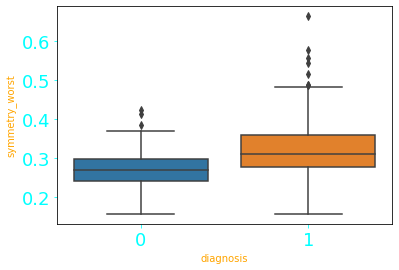

In [41]:
ax = sns.boxplot('diagnosis','symmetry_worst', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

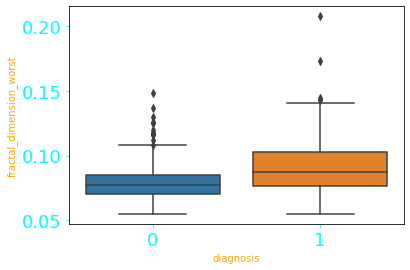

In [42]:
ax = sns.boxplot('diagnosis','fractal_dimension_worst', data = df)
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')

#### Its worth noting that features like 'fractal_dimension_mean',  'texture_se',   'smoothness_se',  'symmetry_se',   'fractal_dimension_se'  have zero to no effect on the target
      

______________________________________________

#### Let us explore the relationship among the features using df.corr() function

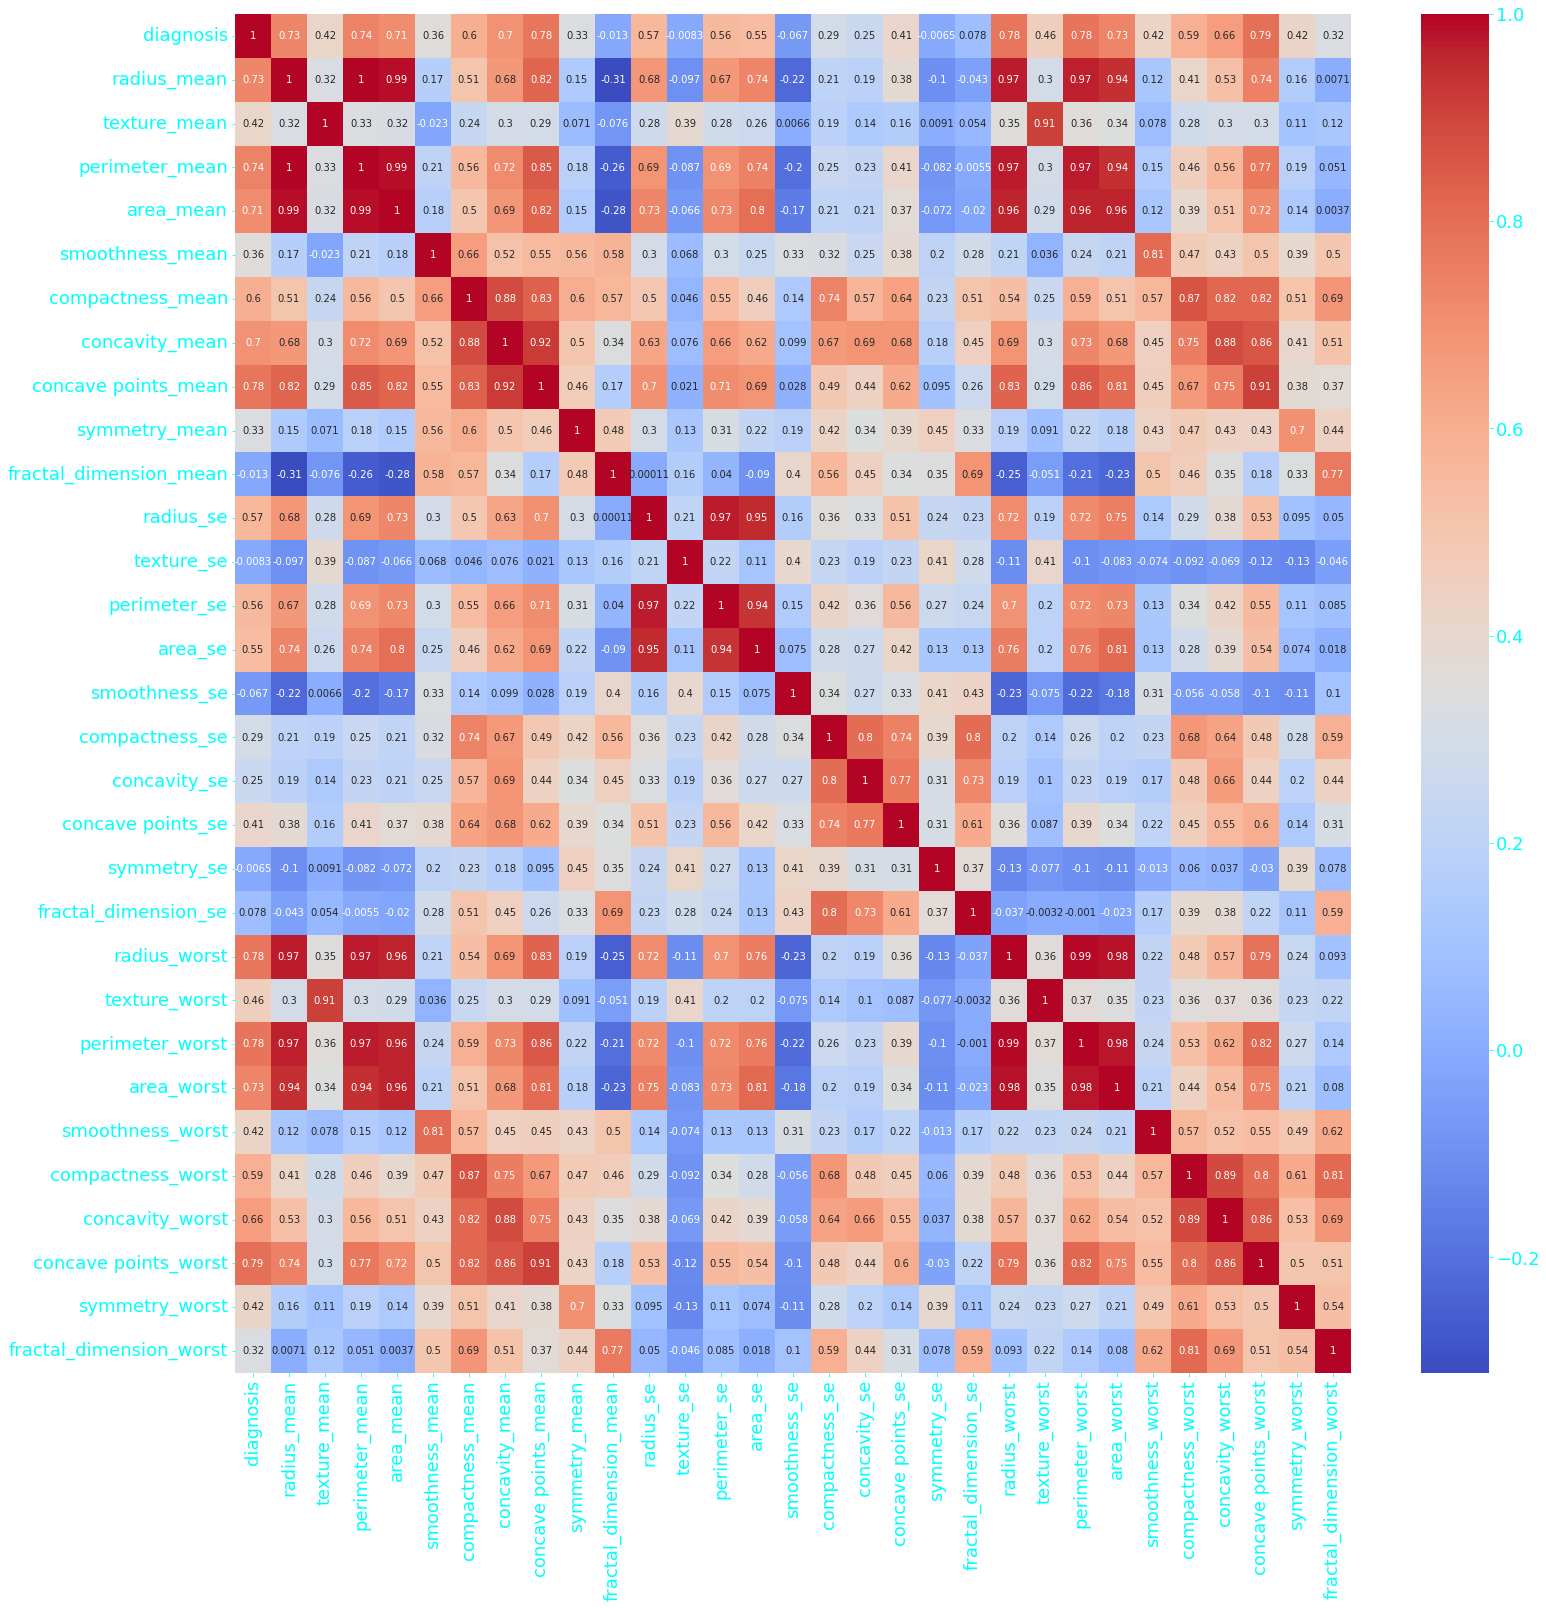

In [43]:
#Showing the correlation among features
corr_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('C:/MLCourse/Learning/Guvi_Final_Projects/Breast_C/heatmap.jpg',dpi=500)
plt.show()

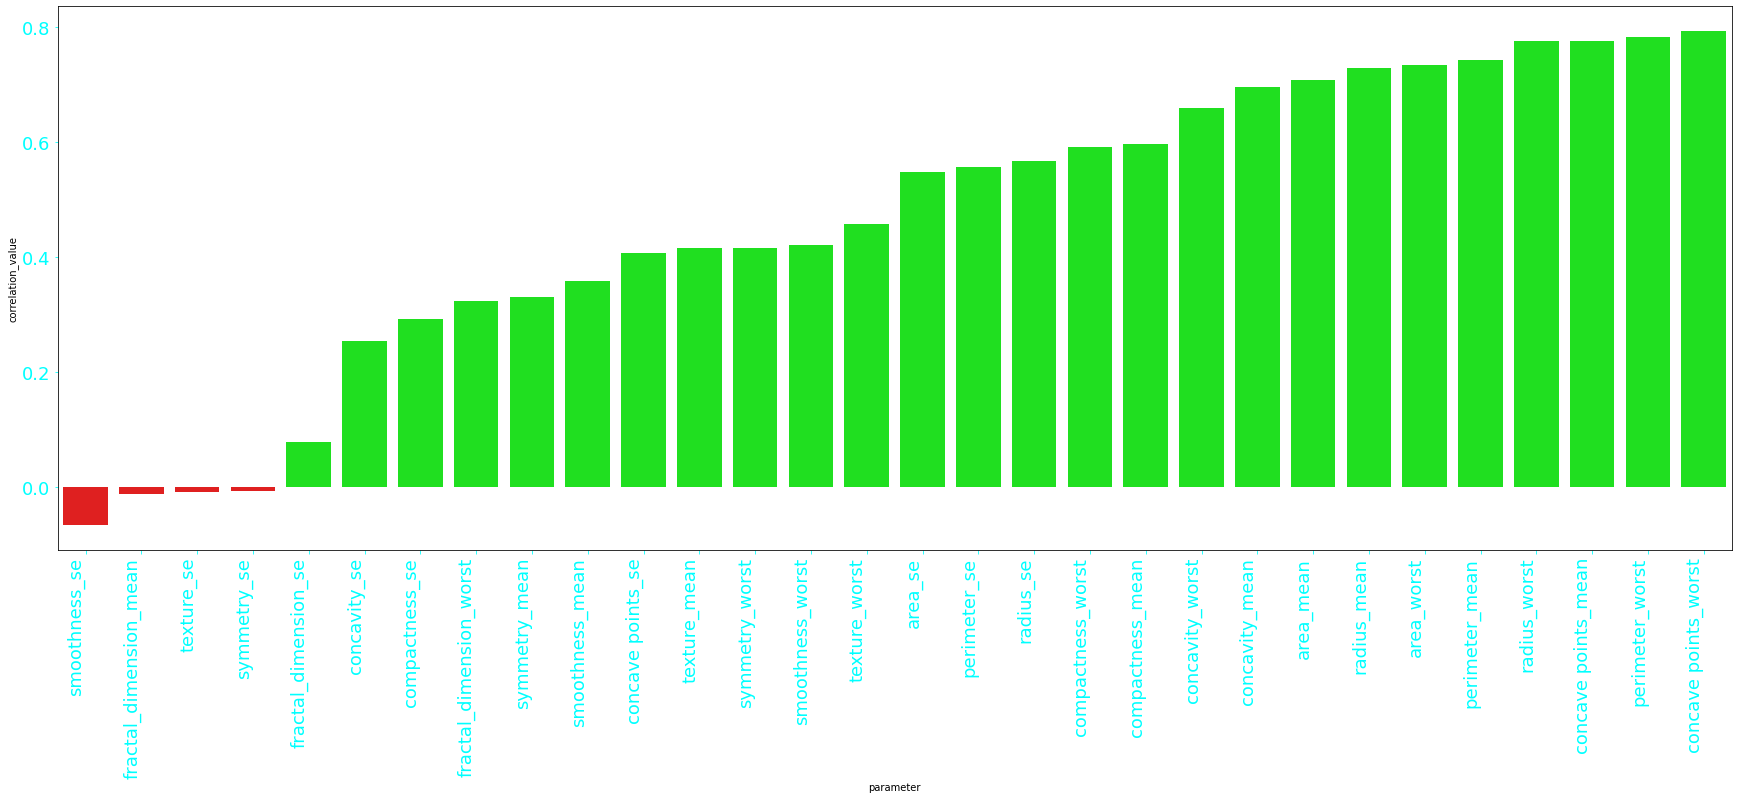

In [44]:
#Showing the correaltion between target and individual features
plt.figure(figsize=(30,10))
df_corr = df.corr()
res = df_corr['diagnosis'][1:]
res1 = res.reset_index()
res1.rename(columns={'index':'parameter','diagnosis':'correlation_value'}, inplace = True)
res2 = res1.sort_values(by = 'correlation_value',ascending = True)
colors = ['red' if val < 0 else 'lime' for val in res2['correlation_value']]
ax = sns.barplot(data=res2, x='parameter', y='correlation_value', palette=colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.savefig('C:/MLCourse/Learning/Guvi_Final_Projects/Breast_C/corr.jpg',dpi=500)
plt.show()

#### 4 features are negatively correlated with the target, while the rest are postively correlated. Nearly 10 features show a strong positive correlation with the final outcome.

In [45]:
#Displaying the features which have negative correlation with the target
neg_corr = res2[res2['correlation_value'] < 0]
neg_corr.sort_values(by='correlation_value', ascending = True, inplace=True)
print('Features having negative correlation with the target')
print('')
print(neg_corr.reset_index(drop=True))

Features having negative correlation with the target

                parameter  correlation_value
0           smoothness_se          -0.067016
1  fractal_dimension_mean          -0.012838
2              texture_se          -0.008303
3             symmetry_se          -0.006522


In [46]:
#Displaying the features which have positive correlation with the target
pos_corr = res2[res2['correlation_value'] > 0]
pos_corr.sort_values(by='correlation_value', ascending = True, inplace=True)
print('Features having positive correlation with the target')
print('')
print(pos_corr.reset_index(drop=True))

Features having positive correlation with the target

                  parameter  correlation_value
0      fractal_dimension_se           0.077972
1              concavity_se           0.253730
2            compactness_se           0.292999
3   fractal_dimension_worst           0.323872
4             symmetry_mean           0.330499
5           smoothness_mean           0.358560
6         concave points_se           0.408042
7              texture_mean           0.415185
8            symmetry_worst           0.416294
9          smoothness_worst           0.421465
10            texture_worst           0.456903
11                  area_se           0.548236
12             perimeter_se           0.556141
13                radius_se           0.567134
14        compactness_worst           0.590998
15         compactness_mean           0.596534
16          concavity_worst           0.659610
17           concavity_mean           0.696360
18                area_mean           0.708984
19    

### Before proceeding with feature scaling and hyper parameter tuning , let us get the f1 score of the dataset to set a benchmark first

In [47]:
#Defining feature, target and performing train, test split
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
all_metrics = []

In [48]:
#Fitting the model and performing the prediction
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Classification report of original dataset')
print(classification_report(y_test,y_pred))

Classification report of original dataset
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



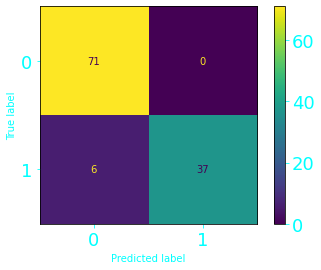

In [49]:
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.savefig('C:\MLCourse\Learning\Guvi_Final_Projects\Breast_C\CM1.jpg',dpi=200)
plt.show()

In [50]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test,y_pred, labels=model.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Original dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 71, False Positive = 0, False Negative = 6,True Positive = 37
Accuracy is 0.95
Precision is 1.0
Sensitivity is 0.86
Specificity is 1.0
F1 Score is 0.92


#### Since the dataset has features with outliers, choosing standard scaler over normal scaler

In [51]:
ss = StandardScaler()
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)
X_ss = ss.fit_transform(X)
x_train_ss, x_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss,y,test_size=0.2, random_state=42)

In [52]:
model_ss = SVC()
model_ss.fit(x_train_ss,y_train_ss)
y_pred_ss = model_ss.predict(x_test_ss)
print('Classification report of scaled dataset')
print(classification_report(y_test_ss,y_pred_ss))

Classification report of scaled dataset
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



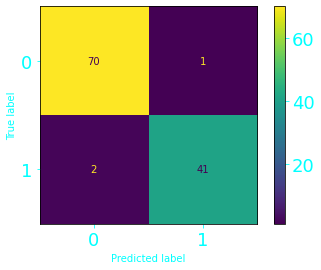

In [53]:
cm = confusion_matrix(y_test_ss,y_pred_ss, labels=model_ss.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ss.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.savefig('C:\MLCourse\Learning\Guvi_Final_Projects\Breast_C\CM2.jpg',dpi=200)
plt.show()

In [54]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_ss,y_pred_ss, labels=model_ss.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Scaled dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

True negative = 70, False Positive = 1, False Negative = 2,True Positive = 41
Accuracy is 0.97
Precision is 0.98
Sensitivity is 0.95
Specificity is 0.99
F1 Score is 0.96


#### As seen above scaling alone is improving the accuracy by 2%

### Performed GridSearch to find the best parameters for SVM and ensemble models 

In [55]:
#model_SVC = SVC(C=2.5,coef0=1.0,gamma='auto',kernel='rbf',tol=0.001)
model_SVC = SVC(C=3.0,coef0=1.0,gamma='auto',kernel='rbf',tol=0.001)
model_SVC.fit(x_train_ss,y_train_ss)
y_pred_SVC = model_SVC.predict(x_test_ss)
print('Classification report of SVC - Hyper parameter tuned dataset')
print(classification_report(y_test_ss,y_pred_SVC))

Classification report of SVC - Hyper parameter tuned dataset
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



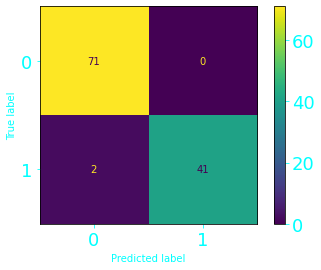

In [56]:
cm = confusion_matrix(y_test_ss,y_pred_SVC, labels=model_SVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_SVC.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.savefig('C:\MLCourse\Learning\Guvi_Final_Projects\Breast_C\CM-SVC.jpg',dpi=200)
plt.show()

In [57]:
metrics = []
print('For SVC- Tuned dataset')
print('')
tn, fp, fn, tp = confusion_matrix(y_test_ss,y_pred_SVC, labels=model_SVC.classes_).ravel()
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('SVC - Tuned dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

For SVC- Tuned dataset

True negative = 71, False Positive = 0, False Negative = 2,True Positive = 41
Accuracy is 0.98
Precision is 1.0
Sensitivity is 0.95
Specificity is 1.0
F1 Score is 0.97


In [58]:
#model_RFC = RandomForestClassifier(criterion= 'entropy', max_depth= 6, max_features= 'sqrt', n_estimators= 200)
model_RFC = RandomForestClassifier(criterion= 'entropy', max_depth= 7, max_features= 'log2', n_estimators= 400)
model_RFC.fit(x_train_ss,y_train_ss)
y_pred_RFC = model_RFC.predict(x_test_ss)
print('Classification report of RFC - Hyper parameter tuned dataset')
print(classification_report(y_test_ss,y_pred_RFC))

Classification report of RFC - Hyper parameter tuned dataset
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



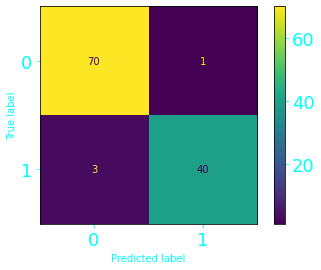

In [59]:
cm = confusion_matrix(y_test_ss,y_pred_RFC, labels=model_RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_RFC.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.savefig('C:\MLCourse\Learning\Guvi_Final_Projects\Breast_C\CM-RFC.jpg',dpi=200)
plt.show()

In [60]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_ss,y_pred_RFC, labels=model_RFC.classes_).ravel()
print('For RFC - Tuned dataset')
print('')
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('RFC - Tuned dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

For RFC - Tuned dataset

True negative = 70, False Positive = 1, False Negative = 3,True Positive = 40
Accuracy is 0.96
Precision is 0.98
Sensitivity is 0.93
Specificity is 0.99
F1 Score is 0.95


In [62]:
model_BAG = BaggingClassifier(max_features= 0.8, max_samples= 0.7, n_estimators=50)
model_BAG.fit(x_train_ss,y_train_ss)
y_pred_BAG = model_BAG.predict(x_test_ss)
print('Classification report of Bagging - Hyper parameter tuned dataset')
print(classification_report(y_test_ss,y_pred_BAG))

Classification report of Bagging - Hyper parameter tuned dataset
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



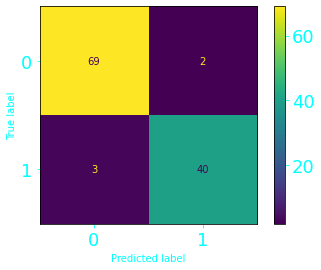

In [63]:
cm = confusion_matrix(y_test_ss,y_pred_BAG, labels=model_BAG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_BAG.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.savefig('C:\MLCourse\Learning\Guvi_Final_Projects\Breast_C\CM-BAG.jpg',dpi=200)
plt.show()

In [64]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_ss,y_pred_BAG, labels=model_BAG.classes_).ravel()
print('For Bagging Classifier - Tuned dataset')
print('')
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Bagging Classifier - Tuned dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

For Bagging Classifier - Tuned dataset

True negative = 69, False Positive = 2, False Negative = 3,True Positive = 40
Accuracy is 0.96
Precision is 0.95
Sensitivity is 0.93
Specificity is 0.97
F1 Score is 0.94


In [65]:
#model_ADA = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1.0, n_estimators = 125)
model_ADA = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1.0, n_estimators = 125)
model_ADA.fit(x_train_ss,y_train_ss)
y_pred_ADA = model_ADA.predict(x_test_ss)
print('Classification report of AdaBoost - Hyper parameter tuned dataset')
print(classification_report(y_test_ss,y_pred_ADA))

Classification report of AdaBoost - Hyper parameter tuned dataset
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



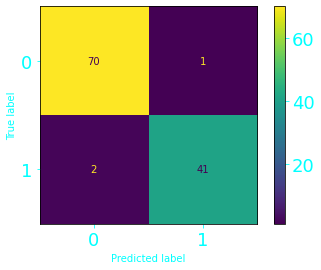

In [66]:
cm = confusion_matrix(y_test_ss,y_pred_ADA, labels=model_ADA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ADA.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.savefig('C:\MLCourse\Learning\Guvi_Final_Projects\Breast_C\CM-ADA.jpg',dpi=200)
plt.show()

In [67]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_ss,y_pred_ADA, labels=model_ADA.classes_).ravel()
print('For Ada Boost - Tuned dataset')
print('')
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Ada Boost - Tuned dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

For Ada Boost - Tuned dataset

True negative = 70, False Positive = 1, False Negative = 2,True Positive = 41
Accuracy is 0.97
Precision is 0.98
Sensitivity is 0.95
Specificity is 0.99
F1 Score is 0.96


In [68]:
#model_GB = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 1.5, loss= 'exponential', max_depth= 7, max_features= 'sqrt', min_impurity_decrease= 0.1, min_samples_leaf= 4, min_samples_split= 0.8, n_estimators= 100)
model_GB = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.5, loss='exponential', max_depth=7, max_features='sqrt', min_impurity_decrease=0.15, min_samples_leaf= 4, min_samples_split=0.8, n_estimators=50)
model_GB.fit(x_train_ss,y_train_ss)
y_pred_GB = model_GB.predict(x_test_ss)
print('Classification report of Gradient Boosting - Hyper parameter tuned dataset')
print(classification_report(y_test_ss,y_pred_GB))

Classification report of Gradient Boosting - Hyper parameter tuned dataset
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



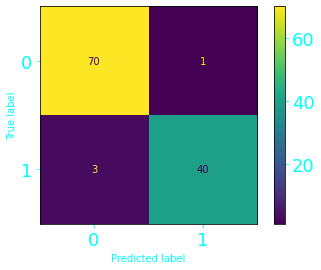

In [69]:
cm = confusion_matrix(y_test_ss,y_pred_GB, labels=model_GB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_GB.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.savefig('C:\MLCourse\Learning\Guvi_Final_Projects\Breast_C\CM-GB.jpg',dpi=200)
plt.show()

In [70]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_ss,y_pred_GB, labels=model_GB.classes_).ravel()
print('For Gradient Boost - Tuned dataset')
print('')
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Gradient Boost - Tuned dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

For Gradient Boost - Tuned dataset

True negative = 70, False Positive = 1, False Negative = 3,True Positive = 40
Accuracy is 0.96
Precision is 0.98
Sensitivity is 0.93
Specificity is 0.99
F1 Score is 0.95


In [71]:
#model_XGB = xgb.XGBClassifier(gamma = 0.05, learning_rate = 0.15, max_depth= 5, n_estimators= 30, num_parallel_tree= 10)
model_XGB = xgb.XGBClassifier(gamma=0.05, learning_rate=0.15, max_depth=10, n_estimators=30, num_parallel_tree=10)
model_XGB.fit(x_train_ss,y_train_ss)
y_pred_XGB = model_XGB.predict(x_test_ss)
print('Classification report of Extreme Gradient Boosting - Hyper parameter tuned dataset')
print(classification_report(y_test_ss,y_pred_XGB))

Classification report of Extreme Gradient Boosting - Hyper parameter tuned dataset
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



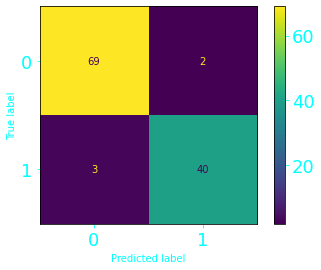

In [72]:
cm = confusion_matrix(y_test_ss,y_pred_XGB, labels=model_XGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_XGB.classes_)
disp.plot()
plt.xlabel('Predicted label',color='cyan')
plt.ylabel('True label',color='cyan')
plt.savefig('C:\MLCourse\Learning\Guvi_Final_Projects\Breast_C\CM-XGB.jpg',dpi=200)
plt.show()

In [73]:
metrics = []
tn, fp, fn, tp = confusion_matrix(y_test_ss,y_pred_XGB, labels=model_XGB.classes_).ravel()
print('For Extreme Gradient Boost - Tuned dataset')
print('')
print(f'True negative = {tn}, False Positive = {fp}, False Negative = {fn},True Positive = {tp}')
accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
specifitivity = round(tn/(tn+fp),2)
f1_score = round((2*precision*recall)/(precision+recall),2)
metrics.append('Extreme Gradient Boost - Tuned dataset')
metrics.append(fp)
metrics.append(fn)
metrics.append(accuracy)
metrics.append(precision)
metrics.append(recall)
metrics.append(specifitivity)
metrics.append(f1_score)
print(f'Accuracy is {accuracy}')
print(f'Precision is {precision}')
print(f'Sensitivity is {recall}')
print(f'Specificity is {specifitivity}')
print(f'F1 Score is {f1_score}')
all_metrics.append(metrics)

For Extreme Gradient Boost - Tuned dataset

True negative = 69, False Positive = 2, False Negative = 3,True Positive = 40
Accuracy is 0.96
Precision is 0.95
Sensitivity is 0.93
Specificity is 0.97
F1 Score is 0.94


In [74]:
df_res = pd.DataFrame(all_metrics)
df_res.rename(columns={0:'Index',1:'False_Positive',2:'False_Negative',3:'Accuracy',4:'Precision',5:'Recall',6:'Specificity',7:'F1_Score'}, inplace=True)
df_res.set_index('Index', inplace=True)
print('\t \t \t Displaying the metrics for all the datasets')
print('')
df_res

	 	 	 Displaying the metrics for all the datasets



False_Positive  False_Negative  \
Index                                                                    
Original dataset                                     0               6   
Scaled dataset                                       1               2   
SVC - Tuned dataset                                  0               2   
RFC - Tuned dataset                                  1               3   
Bagging Classifier - Tuned dataset                   2               3   
Ada Boost - Tuned dataset                            1               2   
Gradient Boost - Tuned dataset                       1               3   
Extreme Gradient Boost - Tuned dataset               2               3   

                                        Accuracy  Precision  Recall  \
Index                                                                 
Original dataset                            0.95       1.00    0.86   
Scaled dataset                              0.97       0.98    0.95   
SVC - Tuned dataset                         0.98       1.00    0.95   
RFC - Tuned dataset                         0.96       0.98    0.93   
Bagging Classifier - Tuned dataset          0.96       0.95    0.93   
Ada Boost - Tuned dataset                   0.97       0.98    0.95   
Gradient Boost - Tuned dataset              0.96       0.98    0.93   
Extreme Gradient Boost - Tuned dataset      0.96       0.95    0.93   

                                        Specificity  F1_Score  
Index                                                          
Original dataset                               1.00      0.92  
Scaled dataset                                 0.99      0.96  
SVC - Tuned dataset                            1.00      0.97  
RFC - Tuned dataset                            0.99      0.95  
Bagging Classifier - Tuned dataset             0.97      0.94  
Ada Boost - Tuned dataset                      0.99      0.96  
Gradient Boost - Tuned dataset                 0.99      0.95  
Extreme Gradient Boost - Tuned dataset         0.97      0.94

In [75]:
# Visualizing through plotly-sunburst
df_long = df_res.reset_index().melt(id_vars='Index', var_name='Metric', value_name='Value')
px.sunburst(data_frame = df_long, path=['Index','Metric','Value'],)

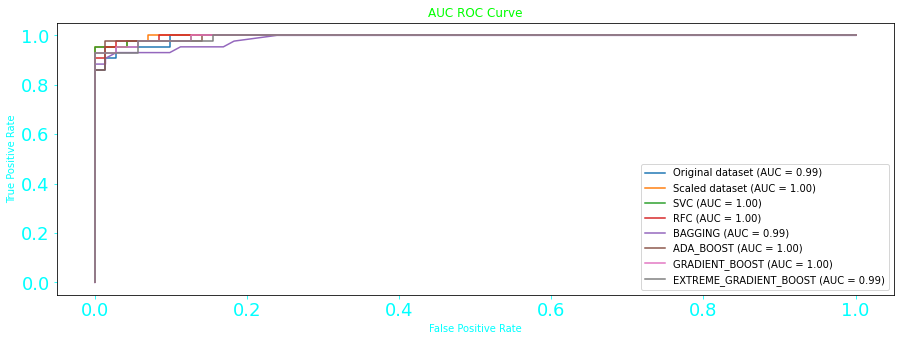

In [76]:
fig, ax = plt.subplots(figsize=(15, 5))
disp = plot_roc_curve(model, x_test, y_test,ax=ax,name = 'Original dataset')
plot_roc_curve(model_ss, x_test_ss, y_test_ss, ax=ax,name = 'Scaled dataset')
plot_roc_curve(model_SVC, x_test_ss, y_test_ss, ax=ax,name = 'SVC')
plot_roc_curve(model_RFC, x_test_ss, y_test_ss, ax=ax,name = 'RFC')
plot_roc_curve(model_BAG, x_test_ss, y_test_ss, ax=ax,name = 'BAGGING')
plot_roc_curve(model_ADA, x_test_ss, y_test_ss, ax=ax,name = 'ADA_BOOST')
plot_roc_curve(model_GB, x_test_ss, y_test_ss, ax=ax,name = 'GRADIENT_BOOST')
plot_roc_curve(model_XGB, x_test_ss, y_test_ss, ax=ax,name = 'EXTREME_GRADIENT_BOOST')
plt.xlabel('False Positive Rate',color='cyan')
plt.ylabel('True Positive Rate',color='cyan')
plt.title('AUC ROC Curve', color = 'lime')
plt.legend()
plt.show()

#### The verdict: SVC outperformed Ensemble models (Random Forest Classifier, AdaBoost, GradientBoost and even ExtremeGradientBoost algorithms) with a superior F1_Score, 0 False Positives and only 2 False Negatives for the entire dataset.

### ---------------------------------------------------------------------------------------------------------


#### An Effort by : MAVERICK_GR 
DEVELOPER CONTACT DETAILS

email id: gururaj008@gmail.com

Personal webpage hosting other Datascience projects:

https://gururaj008-personal-webpage.streamlit.app/

http://gururaj008.pythonanywhere.com/

LinkedIn profile : https://www.linkedin.com/in/gururaj-hc-machine-learning-enthusiast/

Github link: https://github.com/Gururaj008